# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

(1024, 768, 3)
uint8


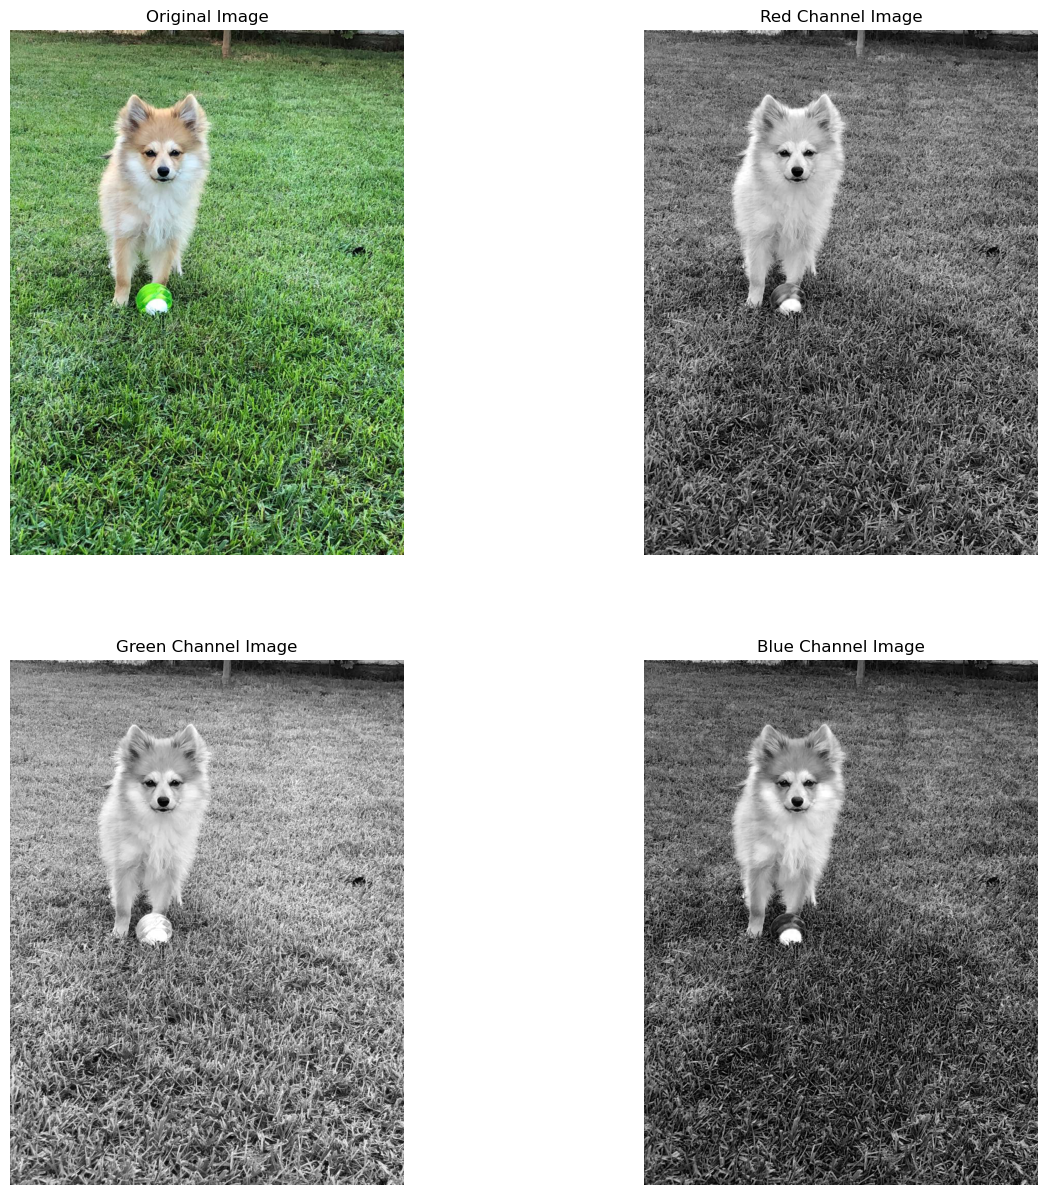

In [2]:
#your solution
rocki = io.imread("./images_notebook/rocki.jpeg")
r_channel = rocki[:,:,0]
g_channel = rocki[:,:,1]
b_channel = rocki[:,:,2]

print(rocki.shape)
print(rocki.dtype)

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))  #We use a plot with 3 subplots for visualize 3 images in 1 figure

#In the fist row we show the rocki image, without axis and with its corresponding title
ax = axs[0][0]
ax.imshow(rocki)
ax.axis('off')
ax.set_title("Original Image")

ax = axs[0][1]
ax.imshow(r_channel, cmap = 'gray')
ax.axis('off')
ax.set_title("Red Channel Image")

ax = axs[1][0]
ax.imshow(g_channel, cmap = 'gray')
ax.axis('off')
ax.set_title("Green Channel Image")

ax = axs[1][1]
ax.imshow(b_channel, cmap = 'gray')
ax.axis('off')
ax.set_title("Blue Channel Image")
plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

**The pixel intensity values. The histogram is a graph showing the number of pixels in an image at each different intensity value found in that image.**

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

**The towers or bars of a histogram are called bins, and they show different intensities.**

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**the gray histogram is the histogram with more centred intensities while the others (Red, Green and Blue) decline theirselves to low intensities**

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

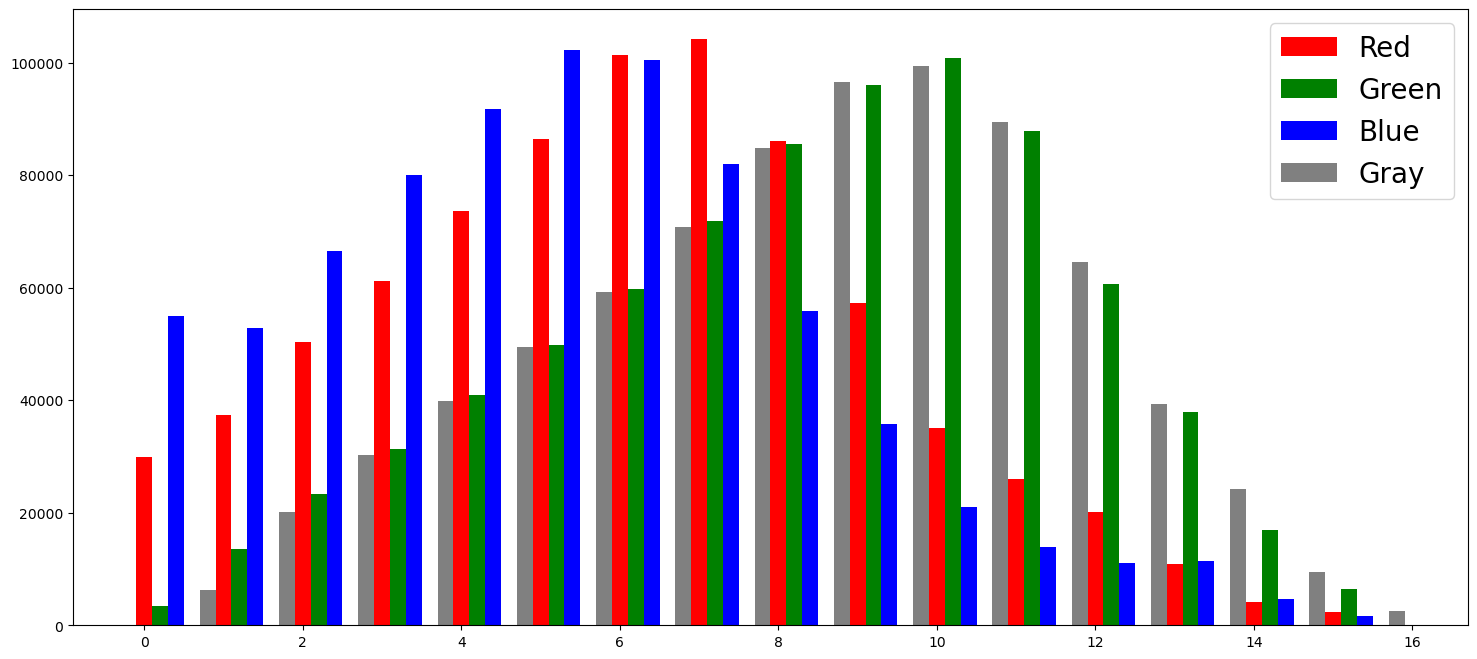

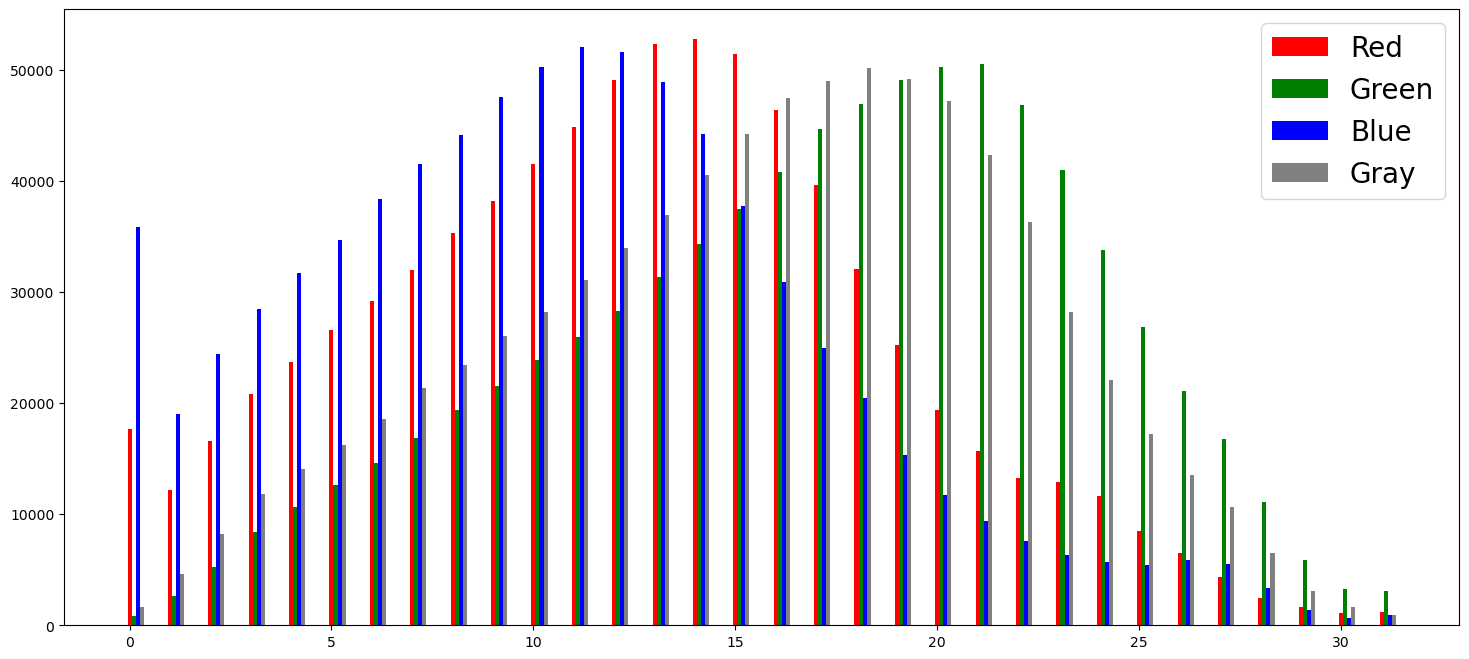

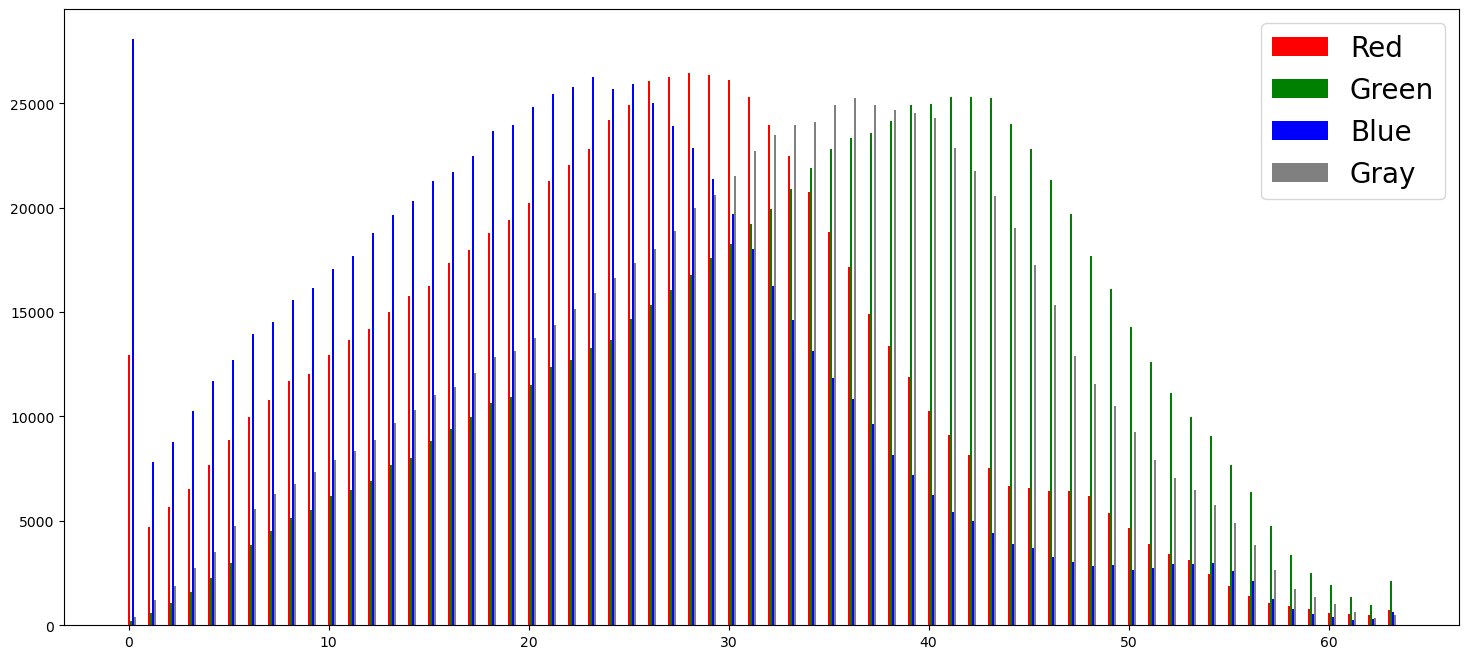

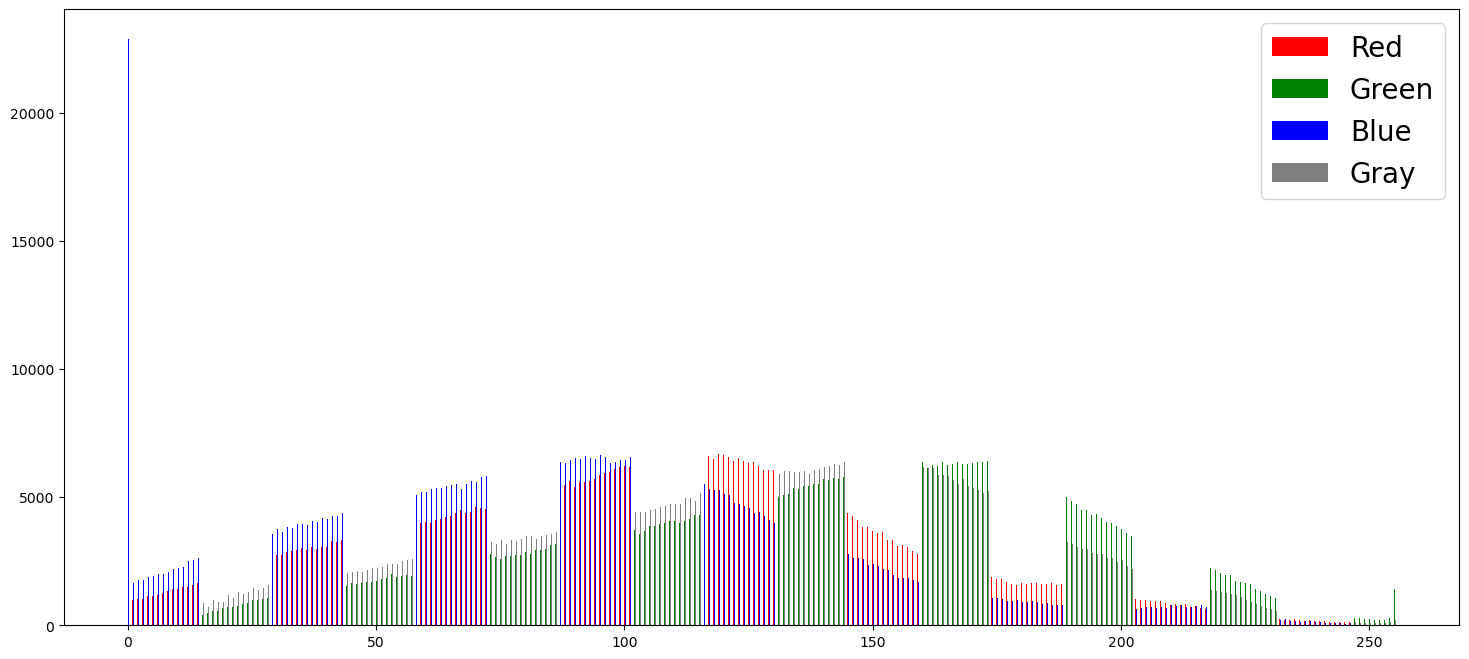

NameError: name 'ind' is not defined

<Figure size 1800x800 with 0 Axes>

In [5]:
from skimage.exposure import histogram
from skimage import img_as_float
from skimage.color import rgb2gray
import pylab as pl


rocki_gray = rgb2gray(rocki)



def im_hist(im, nbins=8):
    histograma = histogram( im, nbins=nbins)
    return histograma


#your solution
hst_r_16, bins_r_16 = histogram(img_as_float(r_channel), nbins=16)
hst_g_16, bins_g_16 = histogram(img_as_float(g_channel), nbins=16)
hst_b_16, bins_b_16 = histogram(img_as_float(b_channel), nbins=16)
hst_gr_16, bins_gr_16 = histogram(img_as_float(rocki_gray), nbins=16)

hst_r_32, bins_r_32 = histogram(img_as_float(r_channel), nbins=32)
hst_g_32, bins_g_32 = histogram(img_as_float(g_channel), nbins=32)
hst_b_32, bins_b_32 = histogram(img_as_float(b_channel), nbins=32)
hst_gr_32, bins_gr_32 = histogram(img_as_float(rocki_gray), nbins=32)

hst_r_64, bins_r_64 = histogram(img_as_float(r_channel), nbins=64)
hst_g_64, bins_g_64 = histogram(img_as_float(g_channel), nbins=64)
hst_b_64, bins_b_64 = histogram(img_as_float(b_channel), nbins=64)
hst_gr_64, bins_gr_64 = histogram(img_as_float(rocki_gray), nbins=64)

hst_r_256, bins_r_256 = histogram(img_as_float(r_channel), nbins=256)
hst_g_256, bins_g_256 = histogram(img_as_float(g_channel), nbins=256)
hst_b_256, bins_b_256 = histogram(img_as_float(b_channel), nbins=256)
hst_gr_256, bins_gr_256 = histogram(img_as_float(rocki_gray), nbins=256)

ind16 = np.arange(16)
ind32 = np.arange(32)
ind64 = np.arange(64)
ind256 = np.arange(256)

fig = plt.figure(figsize=(18,8))

cl_r_16 = plt.bar(ind16, hst_r_16, 0.2, color = 'r')
cl_g_16 = plt.bar(ind16 + 0.2, hst_g_16, 0.2, color = 'g')
cl_b_16 = plt.bar(ind16 + 0.4, hst_b_16, 0.2, color = 'b')
cl_gr_16 = plt.bar(ind16 + 0.8, hst_gr_16, 0.2, color = 'gray')
plt.legend((cl_r_16[0], cl_g_16[0], cl_b_16[0], cl_gr_16[0]), ('Red','Green','Blue', 'Gray'), loc=1, prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(18,8))
cl_r_32 = plt.bar(ind32, hst_r_32, 0.1, color = 'r')
cl_g_32 = plt.bar(ind32 + 0.1, hst_g_32, 0.1, color = 'g')
cl_b_32 = plt.bar(ind32 + 0.2, hst_b_32, 0.1, color = 'b')
cl_gr_32 = plt.bar(ind32 + 0.3, hst_gr_32, 0.1, color = 'gray')
plt.legend((cl_r_32[0], cl_g_32[0], cl_b_32[0], cl_gr_32[0]), ('Red','Green','Blue','Gray'), loc=1, prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(18,8))
cl_r_64 = plt.bar(ind64, hst_r_64, 0.1, color = 'r')
cl_g_64 = plt.bar(ind64 + 0.1, hst_g_64, 0.1, color = 'g')
cl_b_64 = plt.bar(ind64 + 0.2, hst_b_64, 0.1, color = 'b')
cl_gr_64 = plt.bar(ind64 + 0.3, hst_gr_64, 0.1, color = 'gray')
plt.legend((cl_r_64[0], cl_g_64[0], cl_b_64[0], cl_gr_64[0]), ('Red','Green','Blue','Gray'), loc=1, prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(18,8))
cl_r_256 = plt.bar(ind256, hst_r_256, 0.1, color = 'r')
cl_g_256 = plt.bar(ind256 + 0.1, hst_g_256, 0.1, color = 'g')
cl_b_256 = plt.bar(ind256 + 0.2, hst_b_256, 0.1, color = 'b')
cl_gr_256 = plt.bar(ind256 + 0.3, hst_gr_256, 0.1, color = 'gray')
plt.legend((cl_r_256[0], cl_g_256[0], cl_b_256[0], cl_gr_256[0]), ('Red','Green','Blue','Gray'), loc=1, prop={'size': 20})
plt.show()

# Red histogram
fig = plt.figure(figsize=(18,8))
cl_r = plt.bar( ind, hst_r, 0.1, color='r')
pl.title("RED HISTOGRAM")

# Green histogram
fig = plt.figure(figsize=(18,8))
cl_g = plt.bar( ind+.1, hst_g,0.1, color='g')
pl.title("GREEN HISTOGRAM")

# Blue histogram
fig = plt.figure(figsize=(18,8))
cl_b = plt.bar( ind+.2, hst_b,0.1, color='b')
pl.title("BLUE HISTOGRAM")

# GRAYSCALE Histogram
fig = plt.figure(figsize=(18,8))
cl_gray = plt.bar( ind, hst_gray, 0.1, color='gray')
pl.title("GRAYSCALE HISTOGRAM")

plt.show()

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

**Absolutely! depending on the mask you use, you will get plenty of different results, for example the horizontal mask made the rocki's gray image pixels look as if they were wider, while the vertical mask made them look higher. Furthermore, the 2d array made the pixels look as if they'd expanded.**

**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [6]:
from skimage.transform import resize
from skimage import img_as_ubyte # img_as_ubyte converts an image to 8-bit unsigned integer format
from skimage.color import rgb2gray
from scipy import ndimage

rocki_reshape = resize(rocki,(256,256,3))
rocki_gray = rgb2gray(rocki_reshape)
rocki_gray = img_as_float(rocki_gray)

mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
rocki_horiz_convolve = ndimage.convolve(rocki_gray, mask_h1d, mode='constant', cval=0.0)

mask_2 = np.transpose(mask_h1d)
rocki_vert_convolve = ndimage.convolve(rocki_gray, mask_2, mode='constant', cval=0.0)

mask_two_dim = np.zeros((15,15), dtype=np.uint8)
mask_two_dim += 1
mask_two_dim = mask_two_dim / mask_two_dim.sum()

rocki_uniform_convolve = ndimage.convolve(rocki_gray, mask_two_dim, mode='constant', cval=0.0)




b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


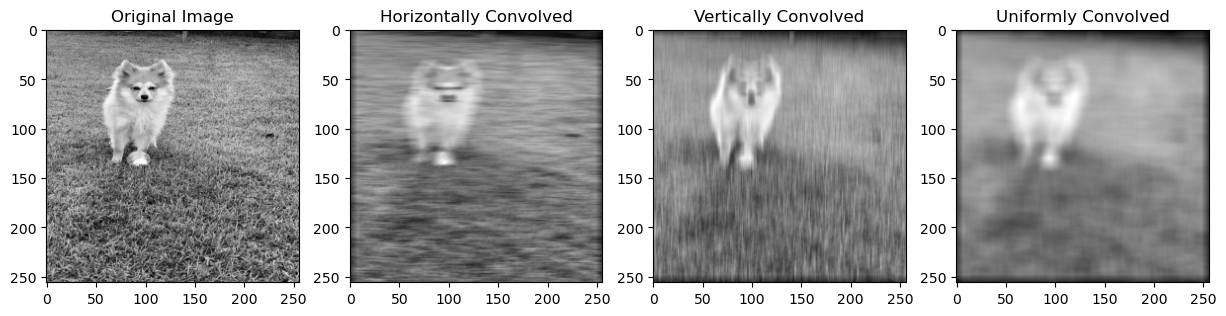

In [7]:
#your solution

fig, axs = plt.subplots(ncols=4,figsize=(15,15))  #We use a plot with 3 subplots for visualize 3 images in 1 figure


ax = axs[0]
ax.imshow(rocki_gray, cmap='gray')
ax.set_title("Original Image")

ax = axs[1]
ax.imshow(rocki_horiz_convolve, cmap='gray')
ax.set_title("Horizontally Convolved")

ax = axs[2]
ax.imshow(rocki_vert_convolve, cmap='gray')
ax.set_title("Vertically Convolved")

ax = axs[3]
ax.imshow(rocki_uniform_convolve, cmap='gray')
ax.set_title("Uniformly Convolved")
plt.show()

c) Can we convolve a color (RGB) image? 

**Yes, we can. We only have to convolve each channel of it.**

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


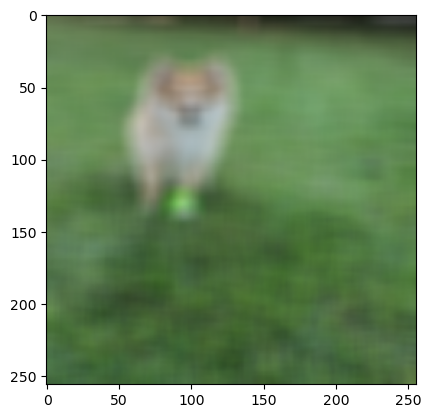

In [8]:
#your solution
#We can not directly convolve the RGB image, but we can convolve each channel (R, G & B)

def conv_coor(image, mask):
    
    #1st of all we change dtype to float
    image = img_as_float(image)
    
    #2nd we create a copy of the orig image
    image_conv = np.copy(image)
    
    #We convolve each channel
    #Red channel -> 0
    image_conv[:,:,0] = ndimage.convolve(image[:,:,0], mask)
    #Green channel -> 1
    image_conv[:,:,1] = ndimage.convolve(image[:,:,1], mask)
    #Blue channel -> 2
    image_conv[:,:,2] = ndimage.convolve(image[:,:,2], mask)
    
    #We return the image
    return image_conv


#We create an uniform 15x15 mask (all the values equals to 1)
uniform_15x15_mask = np.zeros((15,15), dtype=np.uint8)
uniform_15x15_mask += 1

rocki = io.imread("./images_notebook/rocki.jpeg")
rocki_res = resize(rocki,(256,256,3))

#We call the function
image_conv = conv_coor(rocki_res, uniform_15x15_mask).astype(np.uint8)

#And we display the result
plt.imshow(image_conv, cmap='gray')
plt.show()

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.

**Yes, they are different for a simple reason: the larger the image size, the greater the quantity of pixels on that image. That means that the histogram of the bigger image, it's more stuffed than the histogram of the small image because the amount of pixels it has (it can be checked on the amounts represented on 'y' axis).**


(26, 26)
(2560, 2560)


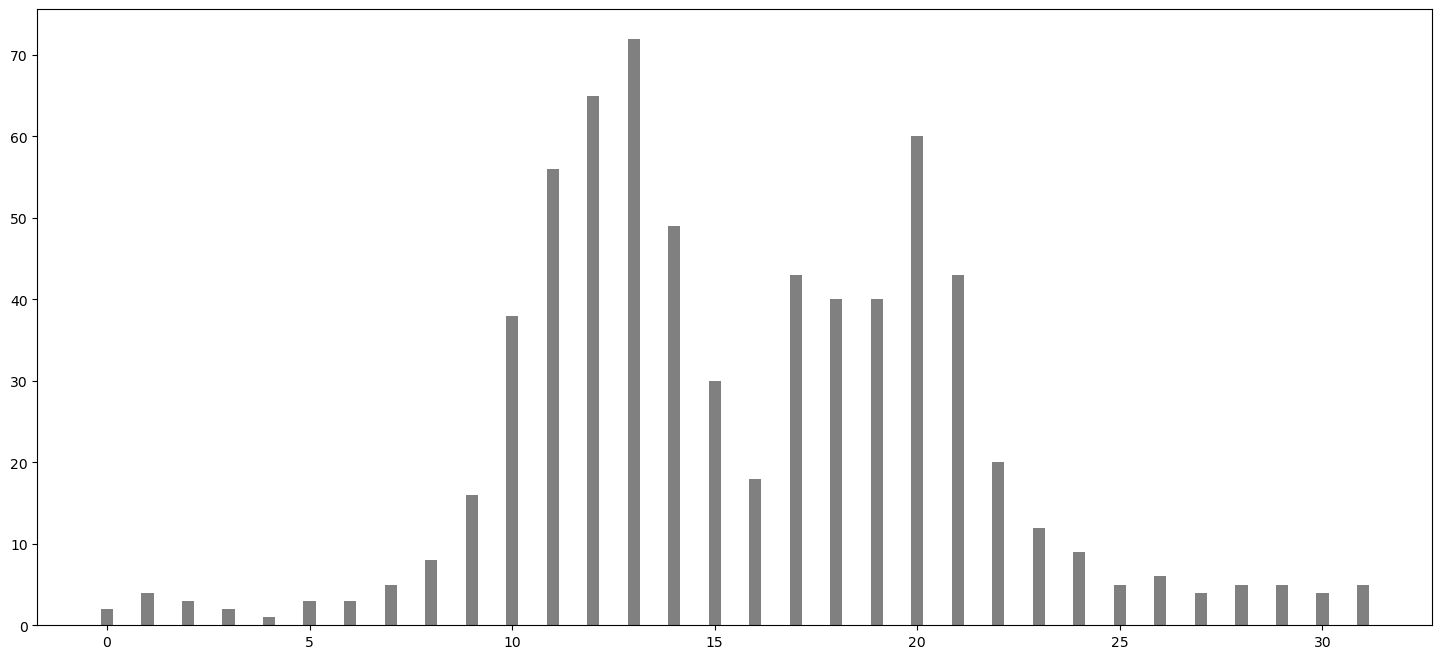

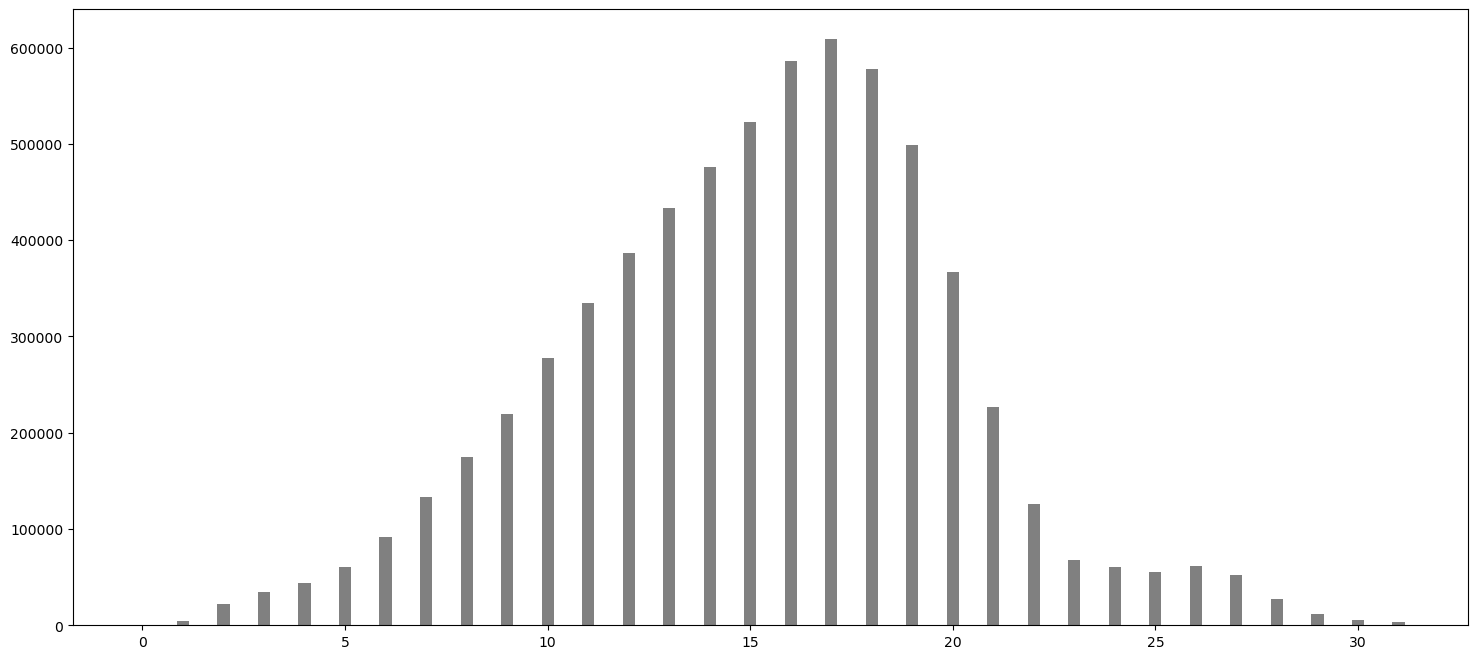

In [10]:
from skimage import data
from skimage.transform import rescale

#your solution
rocki_reduced = rescale(rocki_gray, 0.1)
print(rocki_reduced.shape)
rocki_augmented = rescale(rocki_gray, 10)
print(rocki_augmented.shape)

ind32 = np.arange(32)
hst_rocki_reduced_32, bins_gr_32 = histogram(img_as_float(rocki_reduced), nbins=32)
hst_rocki_augmented_32, bins_gr_32 = histogram(img_as_float(rocki_augmented), nbins=32)

fig = plt.figure(figsize=(18,8))
cl_gr_32 = plt.bar(ind32, hst_rocki_reduced_32, 0.3, color = 'gray')
plt.show()

fig = plt.figure(figsize=(18,8))
cl_gr_32 = plt.bar(ind32, hst_rocki_augmented_32, 0.3, color = 'gray')
plt.show()


b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

**What happens is that a convolution mask affects more to images with low quantity of pixels than images with high quantity of pixels. A 15x15 convolution mask on a matrix of 25x25 will have a bigger effect than on a 2560x2560 because on the 2560x2560 the neighbours will be more alike so a convolution won't change them a lot unlike on smaller matrix where every convolution transforms a lot the matrix**

In [ ]:
#your solution
mask_uniform = np.zeros((15,15), dtype=np.uint8)
mask_uniform += 1


rocki_gray_uniform_convolve = ndimage.convolve(rocki_gray, mask_uniform, mode='constant', cval=0.0)
rocki_reduced_uniform_convolve = ndimage.convolve(rocki_reduced, mask_uniform, mode='constant', cval=0.0)
rocki_augmented_uniform_convolve = ndimage.convolve(rocki_augmented, mask_uniform, mode='constant', cval=0.0)


fig, axs = plt.subplots(ncols=3,figsize=(15,15))  #We use a plot with 3 subplots for visualize 3 images in 1 figure


ax = axs[0]
ax.imshow(rocki_gray_uniform_convolve, cmap='gray')
ax.set_title("Rocki Gray Convolved")

ax = axs[1]
ax.imshow(rocki_reduced_uniform_convolve, cmap='gray')
ax.set_title("Rocki Reduced Convolved")

ax = axs[2]
ax.imshow(rocki_augmented_uniform_convolve, cmap='gray')
ax.set_title("Rocki Augmented Convolved")
plt.show()



ind32 = np.arange(32)
hst_rocki_gray_uniform_convolve, bins_rocki_gray_uniform_convolve = histogram(img_as_float(rocki_gray_uniform_convolve), nbins=32)
hst_rocki_reduced_uniform_convolve, bins_rocki_reduced_uniform_convolve = histogram(img_as_float(rocki_reduced_uniform_convolve), nbins=32)
hst_rocki_augmented_uniform_convolve, bins_rocki_augmented_uniform_convolve = histogram(img_as_float(rocki_augmented_uniform_convolve), nbins=32)


fig = plt.figure(figsize=(18,8))
cl_rocki_gray_uniform_convolve = plt.bar(ind32, hst_rocki_gray_uniform_convolve, 0.3, color = 'b')
plt.show()

fig = plt.figure(figsize=(18,8))
cl_rocki_reduced_uniform_convolve = plt.bar(ind32, hst_rocki_reduced_uniform_convolve, 0.3, color = 'r')
plt.show()

fig = plt.figure(figsize=(18,8))
cl_rocki_augmented_uniform_convolve = plt.bar(ind32, hst_rocki_augmented_uniform_convolve, 0.3, color = 'y')
plt.show()



### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Using different filters on the original image leads to image transformations that can make 2 versions of the original image, with one filter, appear to come from different images just by using different neighbours of the pixels**

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

In [ ]:
from skimage.filters import gaussian
from skimage.filters import median
from skimage.morphology import disk

#your solution
#1st of all we load te image (rocki)
rocki = io.imread("./images_notebook/rocki.jpeg")
#We convert the image to grayscale
rocki_gray = rgb2gray(rocki)

#We create 3 different images using gaussian filter with 3 differents sigmas
rocki_gaussian_1 = gaussian(rocki_gray, sigma = 1)
rocki_gaussian_15 = gaussian(rocki_gray, sigma = 15)
rocki_gaussian_40 = gaussian(rocki_gray, sigma = 40)

#Finally we use the median filter using disk with radius = 10
rocki_median = median(rocki_gray, disk(10))


fig, axs = plt.subplots(ncols=4,figsize=(15,15))
ax = axs[0]
ax.imshow(rocki_gaussian_1, cmap='gray')
ax.set_title("Rocki Gaussian Sigma = 1")

ax = axs[1]
ax.imshow(rocki_gaussian_15, cmap='gray')
ax.set_title("Rocki Gaussian Sigma = 15")

ax = axs[2]
ax.imshow(rocki_gaussian_40, cmap='gray')
ax.set_title("Rocki Gaussian Sigma = 40")

ax = axs[3]
ax.imshow(rocki_median, cmap='gray')
ax.set_title("Rocki Median radius = 10")
plt.show()



b) **(Optional)** Apply the smoothing on some other images and present their results.

In [ ]:
#your solution


### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

**The canny edge detector with hysteresis threshold**

- Which are the optimal parameters for this image? 

**Sigma==1 with hysteresis threshold**

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**before applying the convolve function the mask must be normalized**

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [ ]:
import imageio
from skimage import feature
from skimage import filters 
import warnings
from skimage.color import rgba2rgb

warnings.filterwarnings("ignore")

"""Your Solution"""
#1st of all we load te image (logo)
logo_name = "images_notebook/logo.png"
logo = imageio.imread(logo_name)



logo = rgba2rgb(logo)
#We convert to grayscale
logo_gray = rgb2gray(logo)

#We save the 3 possible images of prewitt
logo_gray_prewitt_h  = filters.prewitt_h(logo_gray)
logo_gray_prewitt_v  = filters.prewitt_v(logo_gray)
logo_gray_prewitt  = filters.prewitt(logo_gray)

#We save the 3 possible images of sobel
logo_gray_sobel_h  = filters.sobel_h(logo_gray)
logo_gray_sobel_v  = filters.sobel_v(logo_gray)
logo_gray_sobel  = filters.sobel(logo_gray)

#We save 3 possible images ussing canny filter with different sigmas
logo_gray_canny_1  = feature.canny(logo_gray, sigma = 1)
logo_gray_canny_3  = feature.canny(logo_gray, sigma = 3)
logo_gray_canny_6  = feature.canny(logo_gray, sigma = 6)

fig, axs = plt.subplots(ncols=4,nrows=3,figsize=(15,15))
#We display all the results of prewitt method 
ax = axs[0][0]
ax.imshow(logo_gray, cmap='gray')
ax.set_title("Gray Logo Original")

ax = axs[0][1]
ax.imshow(logo_gray_prewitt_h, cmap='gray')
ax.set_title("Logo Prewitt Hortiz")

ax = axs[0][2]
ax.imshow(logo_gray_prewitt_v, cmap='gray')
ax.set_title("Logo Prewitt Vert")

ax = axs[0][3]
ax.imshow(logo_gray_prewitt, cmap='gray')
ax.set_title("Logo Prewitt")


#We display all the results of sobel method 
ax = axs[1][0]
ax.imshow(logo_gray, cmap='gray')
ax.set_title("Gray Logo Original")

ax = axs[1][1]
ax.imshow(logo_gray_sobel_h, cmap='gray')
ax.set_title("Logo Sobel Horitz")

ax = axs[1][2]
ax.imshow(logo_gray_sobel_v, cmap='gray')
ax.set_title("Logo Sobel Vert")

ax = axs[1][3]
ax.imshow(logo_gray_sobel, cmap='gray')
ax.set_title("Logo Sobel")


#We display multiple results of canny method 
ax = axs[2][0]
ax.imshow(logo_gray, cmap='gray')
ax.set_title("Gray Logo Original")

ax = axs[2][1]
ax.imshow(logo_gray_canny_1, cmap='gray')
ax.set_title("Logo Canny Sigma = 1")

ax = axs[2][2]
ax.imshow(logo_gray_canny_3, cmap='gray')
ax.set_title("Logo Canny Sigma = 3")

ax = axs[2][3]
ax.imshow(logo_gray_canny_6, cmap='gray')
ax.set_title("Logo Canny Sigma = 6")

plt.show()


b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 

**No, they don't improve**

- Which are the limitations of the different images contour extraction?

**Sobel and Prewitt are fast but sensitive to noise and Canny has problems with pixels with pixels with high intensity change and if the background and the foreground have similar colours it's difficult to take the edges from the image**

In [ ]:
#your solution
ironman = io.imread("./images_notebook/Ironman.jpg")
capitan_america = io.imread("./images_notebook/Capitain_America.jpg")

ironman_gray = rgb2gray(ironman)
capitan_america_gray = rgb2gray(capitan_america)

ironman_gray_prewitt  = filters.prewitt(ironman_gray)
ironman_gray_sobel  = filters.sobel(ironman_gray)
ironman_gray_canny  = feature.canny(ironman_gray)

capitan_america_gray_prewitt  = filters.prewitt(capitan_america_gray)
capitan_america_gray_sobel  = filters.sobel(capitan_america_gray)
capitan_america_gray_canny  = feature.canny(capitan_america_gray)



fig, axs = plt.subplots(nrows = 2, ncols = 4,figsize=(20,10))  #We use a plot with 3 subplots for visualize 3 images in 1 figure

#In the fist row we show the lenna image, without axis and with its corresponding title
ax = axs[0][0]
ax.imshow(ironman_gray, cmap='gray')
ax.set_title("Gray Ironman Original")

ax = axs[0][1]
ax.imshow(ironman_gray_prewitt, cmap='gray')
ax.set_title("Ironman Prewitt")

ax = axs[0][2]
ax.imshow(ironman_gray_sobel, cmap='gray')
ax.set_title("Ironman Sobel")

ax = axs[0][3]
ax.imshow(ironman_gray_canny, cmap='gray')
ax.set_title("Ironman Canny")


ax = axs[1][0]
ax.imshow(capitan_america_gray, cmap='gray')
ax.set_title("Gray Captain America Original")

ax = axs[1][1]
ax.imshow(capitan_america_gray_prewitt, cmap='gray')
ax.set_title("Captain America Prewitt")

ax = axs[1][2]
ax.imshow(capitan_america_gray_sobel, cmap='gray')
ax.set_title("Captain America Sobel")

ax = axs[1][3]
ax.imshow(capitan_america_gray_canny, cmap='gray')
ax.set_title("Captain America Canny")
plt.show()

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.

**The detector can be applied with the matrix or with the function skimage.filters.sobel**

In [ ]:
#your solution

#We can do 3 possibles ways horitzontal sobel, vertical sobel, and sobel
logo_name = "images_notebook/logo.png"
logo = imageio.imread(logo_name)
logo = rgba2rgb(logo)
logo_gray = rgb2gray(logo)



logo_gray_sobel_h  = filters.sobel_h(logo_gray)
logo_gray_sobel_v  = filters.sobel_v(logo_gray)
logo_gray_sobel  = filters.sobel(logo_gray)

fig, axs = plt.subplots(ncols=4,figsize=(15,15))
ax = axs[0]
ax.imshow(logo_gray, cmap='gray')
ax.set_title("Gray Logo Original")

ax = axs[1]
ax.imshow(logo_gray_sobel_h, cmap='gray')
ax.set_title("Logo Sobel Horitz")

ax = axs[2]
ax.imshow(logo_gray_sobel_v, cmap='gray')
ax.set_title("Logo Sobel Vert")

ax = axs[3]
ax.imshow(logo_gray_sobel, cmap='gray')
ax.set_title("Logo Sobel")
plt.show()

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

In [ ]:
#your solution
#We load the both images
ironman = io.imread("./images_notebook/Ironman.jpg")
capitan_america = io.imread("./images_notebook/Capitain_America.jpg")

#We change the type of image, to aply correctly gaussian filter
ironman = img_as_float(ironman)
capitan_america = img_as_float(capitan_america)

#Finally we apply the formula to obtain the modify image
ironman_low_pass_filter = gaussian(ironman, sigma = 10)
capitan_america_low_pass_filter = gaussian(capitan_america, sigma = 10)

ironman_high_pass_filter = ironman - ironman_low_pass_filter
capitan_america_high_pass_filter = capitan_america - capitan_america_low_pass_filter



In [ ]:
#your solution

fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
ax = axs[0][0]
ax.imshow(ironman, cmap='gray')
ax.set_title("Ironman Original")

ax = axs[0][1]
ax.imshow(ironman_low_pass_filter, cmap='gray')
ax.set_title("Ironman Low Pass Filter")

ax = axs[0][2]
ax.imshow(ironman_high_pass_filter, cmap='gray')
ax.set_title("Ironman High Pass Filter")

ax = axs[1][0]
ax.imshow(capitan_america, cmap='gray')
ax.set_title("Capitain America Original")

ax = axs[1][1]
ax.imshow(capitan_america_low_pass_filter, cmap='gray')
ax.set_title("Capitain America Low Pass Filter")

ax = axs[1][2]
ax.imshow(capitan_america_high_pass_filter, cmap='gray')
ax.set_title("Capitain America High Pass Filter")
plt.show()



b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 

**Depending on how far we are from the image. If we're near it we better use ironman's high filter and captain's america low filter. Otherwise we better use ironman's low filter and captain's america high one.**

2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


In [ ]:
#your solution
shape = capitan_america.shape
ironman_low = resize(ironman_low_pass_filter, shape)
ironman_high = resize(ironman_high_pass_filter, shape)

hybrid_ironman_capitain = ironman_low + capitan_america_high_pass_filter
hybrid_capitain_ironma = capitan_america_low_pass_filter + ironman_high

fig, axs = plt.subplots(ncols=2,figsize=(15,15))
ax = axs[0]
ax.imshow(hybrid_ironman_capitain)
ax.set_title("ironman_low + capitan_america_high")

ax = axs[1]
ax.imshow(hybrid_capitain_ironma)
ax.set_title("capitan_america_low + ironman_high")
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

In [ ]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg
#We create the constant matrix to convolve each frame
mask_two_dim = np.zeros((15,15), dtype=np.uint8)
mask_two_dim += 1
mask_two_dim = mask_two_dim / mask_two_dim.sum()


def updatefig1(i): 
    #For each frame, we use the function conv_coor created before, to convolve RGB images
    im.set_array(conv_coor(ic_small[:,:,:,i], mask_two_dim)) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")